In [1]:
import pandas as pd
import numpy as np

# Load data
data = np.fromfile('./servinsp1.dat', dtype=np.float64, sep="\n")

# Sort data
ordered_data = np.sort(data)


In [88]:
import matplotlib.pyplot as plt
import scipy.stats as stats


# Create bins for histogram using class intervals defined by equal probability
mean = np.mean(data)
variance = np.var(data)

num_bins = 20

class_intervals = np.fromfunction(lambda i: (-1/(1/mean))*np.log(1-(i/num_bins)), shape=(num_bins,), dtype=np.float64)

new_class_intervals = np.fromfunction(lambda i: stats.expon.ppf(i/num_bins, scale=mean), shape=(num_bins,))

# class_intervals = np.fromfunction(lambda i: (-1/(1/mean))*np.log(1-(i/num_bins)), shape=(num_bins,), dtype=np.float64)

# Add max value to class intervals to ensure that last bin is shown on chart
class_intervals = np.append(class_intervals, np.ceil(np.max(data)))
# print(class_intervals)

# Create table for data
bar_data = pd.DataFrame({
    'interval_start': class_intervals[:-1],
    'interval_end': class_intervals[1:]
})

In [6]:
# Add actual frequency count to the data table
bar_data['actual_freq'] = [(lambda n: np.count_nonzero((data >= bar_data['interval_start'][n]) & (data < bar_data['interval_end'][n])))(n) for n in range(20)]

    interval_start  interval_end  actual_freq
0        -0.000000      0.531291           16
1         0.531291      1.091315            7
2         1.091315      1.683356           11
3         1.683356      2.311301           10
4         2.311301      2.979785           15
5         2.979785      3.694407           14
6         3.694407      4.462011           18
7         4.462011      5.291086           16
8         5.291086      6.192342           19
9         6.192342      7.179556           17
10        7.179556      8.270871           15
11        8.270871      9.490857           19
12        9.490857     10.873963           18
13       10.873963     12.470642           14
14       12.470642     14.359112           21
15       14.359112     16.670413           13
16       16.670413     19.650198           13
17       19.650198     23.849969           20
18       23.849969     31.029525           12
19       31.029525     77.000000           12


In [15]:
# Add expected frequency to the data table
bar_data['expected_freq'] = [(lambda x: len(data) * (stats.expon.cdf(x=bar_data['interval_end'][x], scale=mean) - stats.expon.cdf(x=bar_data['interval_start'][x], scale=mean)))(x) for x in range(len(bar_data))]

0     15.000000
1     15.000000
2     15.000000
3     15.000000
4     15.000000
5     15.000000
6     15.000000
7     15.000000
8     15.000000
9     15.000000
10    15.000000
11    15.000000
12    15.000000
13    15.000000
14    15.000000
15    15.000000
16    15.000000
17    15.000000
18    15.000000
19    14.822742
Name: expected_freq, dtype: float64


In [28]:
# Add chi square test to the table
bar_data['chi_square'] = [(lambda x: ((bar_data['actual_freq'][x] - bar_data['expected_freq'][x]) ** 2) / bar_data['expected_freq'][x])(x) for x in range(len(bar_data))]

16.60421046348803

(array([10., 11., 12., 13., 14., 15., 16., 17.]),
 [Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

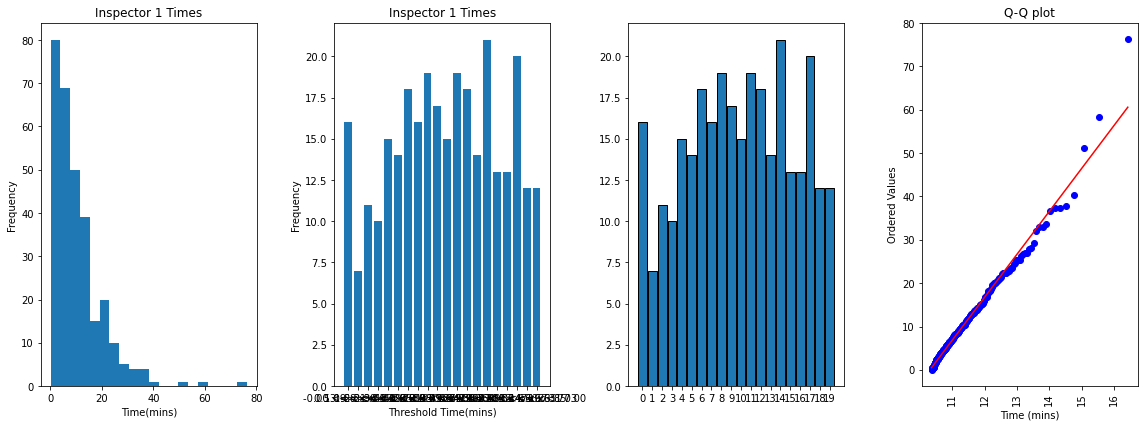

In [87]:

# Create bar chart from data
fig, ax = plt.subplots(nrows=1, ncols=4)


# Histogram with bins of equal width
n, bins, patches = ax[0].hist(data, bins=num_bins)
ax[0].set_title('Inspector 1 Times')
ax[0].set_xlabel('Time(mins)')
ax[0].set_ylabel('Frequency')


threshold = ['{:.2f} <= x < {:.2f}'.format(start, end) for start, end in zip(bar_data['interval_start'], bar_data['interval_end'])]
ax[1].bar(threshold, bar_data['actual_freq'])

ax[1].set_title('Inspector 1 Times')
ax[1].set_xlabel('Threshold Time(mins)')
ax[1].set_ylabel('Frequency')

# Create histogram
n, bins = np.histogram(data, bins=class_intervals)
ax[2].bar(range(len(bar_data)), n, width=0.9, edgecolor='black')
ax[2].set_xticks(range(len(bar_data)))

cs = stats.chisquare(f_obs=bar_data['actual_freq'], f_exp=bar_data['expected_freq'])

# print('chisquared = {}'.format(cs))

# Create Q-Q plot for data
# data_df = pd.DataFrame({'data': data})
# data_df['yj'] = data_df.index
# data_df['yj'] = data_df.apply(lambda row: (row['yj'] - 0.5)/len(data_df), axis=1)
# data_df['f_inv'] = data_df.apply(lambda row: stats.expon.ppf(row['yj']), axis=1)

# ax[2].plot(data_df['yj'], data_df['f_inv'], 'o', color='black')

stats.probplot(x=data, dist='expon', plot=ax[3], sparams=(mean))
ax[3].set_title('Q-Q plot')
ax[3].set_xlabel('Time (mins)')


fig.set_size_inches(16, 6, forward=True)
fig.tight_layout()
plt.xticks(rotation=90)

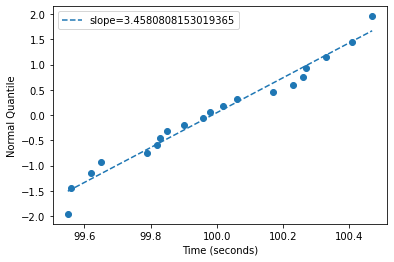

In [6]:

# Plot ordered data on graph

fig, ax = plt.subplots(nrows=1, ncols=1)

robot_df = pd.DataFrame(data={'robotData': [99.55, 99.82, 99.98, 100.26, 99.56, 99.83, 100.02, 100.27, 99.62, 99.85, 100.06, 100.33, 99.65, 99.90, 100.17, 100.41, 99.79, 99.96, 100.23, 100.47]})

# Sort and fix index
robot_df = robot_df.sort_values(by='robotData', ignore_index=True)
robot_df.index += 1 # Shift index

# Add yj and ppf
robot_df['yj'] = robot_df.index
robot_df['yj'] = robot_df.apply(lambda row: (row['yj'] - 0.5)/len(robot_df), axis=1)
robot_df['f_inv'] = robot_df.apply(lambda row: stats.norm.ppf(row['yj']), axis=1)


# Make plot
ax.scatter(robot_df['robotData'], robot_df['f_inv'])
ax.set_ylabel('Normal Quantile')
ax.set_xlabel('Time (seconds)')

# Add line of best fit
m, b = np.polyfit(robot_df['robotData'], robot_df['f_inv'], 1)
ax.plot(robot_df['robotData'], m*robot_df['robotData'] + b, label='slope={}'.format(m), linestyle='dashed')
ax.legend(loc='upper left')


plt.show()


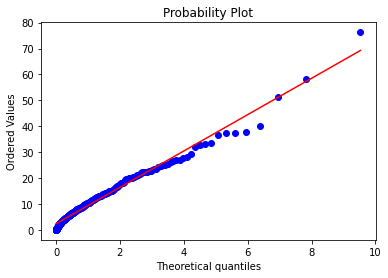

In [31]:
import scipy.stats as stats

stats.probplot(data, dist='exponweib', plot=plt, sparams=(1, 0.8))
plt.show()

cs = None



In [ ]:
# Calculate sample mean

def get_sample_mean(bin_count, bin_edges, num_points):
    '''Get the sample mean for data grouped into class intervals. Works best with numpy arrays from the creation of a histogram i.e. bin_count, bin_edges = plt.hist()'''
    curr_sum = 0
    for index, (edge, freq) in enumerate(zip(bin_edges[1:], bin_count)):
        curr_sum += (freq * (edge - bin_edges[index]))
    
    return curr_sum / num_points


def get_sample_variance(bin_count, bin_edges, num_points, sample_mean):
    '''Get the sample mean for data grouped into class intervals. Works best with numpy arrays from the creation of a histogram i.e. bin_count, bin_edges = plt.hist()'''
    curr_sum = 0
    for index, (edge, freq) in enumerate(zip(bin_edges[1:], bin_count)):
        curr_sum += (freq * ((edge - bin_edges[index])**2))
    
    return (curr_sum - (len(bin_count) * sample_mean**2)) / (num_points - 1)


sample_mean = get_sample_mean(n, bins, len(data))
sample_variance = get_sample_variance(n, bins, len(data), sample_mean)